<a href="https://colab.research.google.com/github/senguptashritama/Multilabel-Classification-of-ResearchPapers/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downlaoded and imported required libraries

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import en_core_web_sm
import pandas as pd
import numpy as np
import string
import spacy
import nltk
import ast
import re


### Loaded data from google drive

(source - https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arxiv_data = pd.read_csv("/content/drive/MyDrive/archive (4)/arxiv_data.csv")
arxiv_data.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51774 entries, 0 to 51773
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     51774 non-null  object
 1   summaries  51774 non-null  object
 2   terms      51774 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


### Removed Duplicates

In [ ]:
duplicate_count = arxiv_data.duplicated().sum()

print("Number of duplicate rows in the DataFrame:", duplicate_count)

Number of duplicate rows in the DataFrame: 12783


In [ ]:
arxiv_data = arxiv_data.drop_duplicates()

print("Duplicates dropped. Cleaned DataFrame:")
arxiv_data

Duplicates dropped. Cleaned DataFrame:


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51767,A Ray-based Approach for Boundary Estimation o...,Diffusion Tensor Imaging (DTI) is a non-invasi...,['cs.CV']
51768,Statistical Denoising for single molecule fluo...,Single molecule fluorescence microscopy is a p...,['cs.CV']
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"


In [ ]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38991 entries, 0 to 51772
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     38991 non-null  object
 1   summaries  38991 non-null  object
 2   terms      38991 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


### Text preprocessing


In [ ]:
# Lowercasing

arxiv_data['titles'] = arxiv_data['titles'].str.lower()
arxiv_data['summaries'] = arxiv_data['summaries'].str.lower()

In [ ]:
# Tokenization

arxiv_data['titles'] = arxiv_data['titles'].apply(word_tokenize)
arxiv_data['summaries'] = arxiv_data['summaries'].apply(word_tokenize)

In [ ]:
# Removing special characters and non-alphanumeric characters

arxiv_data['titles'] = arxiv_data['titles'].apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens])
arxiv_data['summaries'] = arxiv_data['summaries'].apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens])

In [ ]:
# Removing stop words

stop_words = set(stopwords.words('english'))
arxiv_data['titles'] = arxiv_data['titles'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
arxiv_data['summaries'] = arxiv_data['summaries'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
# Lemmatization

nlp = en_core_web_sm.load()
arxiv_data['titles'] = arxiv_data['titles'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])
arxiv_data['summaries'] = arxiv_data['summaries'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])

In [ ]:
# Rejoining tokens

arxiv_data['titles'] = arxiv_data['titles'].apply(' '.join)
arxiv_data['summaries'] = arxiv_data['summaries'].apply(' '.join)

In [ ]:
arxiv_data.head()

,titles,summaries,terms
0,survey semantic stereo match semantic depth ...,stereo match one widely use technique infer de...,"['cs.CV', 'cs.LG']"
1,futureai guide principle consensus recommend...,recent advancement artificial intelligence a...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,enforce mutual consistency hard region semisup...,paper propose novel mutual consistency netwo...,"['cs.CV', 'cs.AI']"
3,parameter decoupling strategy semisupervise 3d...,consistency training prove advanced semisuperv...,['cs.CV']
4,backgroundforeground segmentation interior sen...,ensure safety automate drive correct percept...,"['cs.CV', 'cs.LG']"


### Data exploration and handling class imbalance

1) Counted number of individual unqiue labels

2) Printed top 5 individual labels and their count

3) Counted unqiue labels sets

4) Printed the unqiue labels sets having only the top 5 individual labels

5) Made new dataframe having only those labels

In [ ]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
unique_labels = set(label for labels in arxiv_data['terms'] for label in labels)

count = 0
for label in unique_labels:
    count += 1

print("Total number of each unique label:", count)

Total number of each unique label: 1099


In [ ]:
arxiv_data['terms'] = arxiv_data['terms'].apply(lambda x: [item.strip() for item in x])

all_labels = [label for labels in arxiv_data['terms'] for label in labels]
label_counts = Counter(all_labels)

top_labels = label_counts.most_common(5)

# Printing the top 10 labels and their counts
for label, count in top_labels:
    print(f"{label}: {count} occurrences")

cs.CV: 22264 occurrences
cs.LG: 22251 occurrences
stat.ML: 12432 occurrences
cs.AI: 5952 occurrences
eess.IV: 1763 occurrences


In [ ]:
# Counting unique label sets

unique_label_sets_count = arxiv_data['terms'].apply(lambda x: tuple(sorted(x))).nunique()

print("Number of unique label sets:", unique_label_sets_count)

Number of unique label sets: 2925


In [ ]:
arxiv_data['label_set'] = arxiv_data['terms'].apply(lambda x: ','.join(sorted(x)))
label_set_counts = arxiv_data['label_set'].value_counts()

# Getting the top 10 occurring sets
top_10_sets = label_set_counts.head(10)

print("Top 10 occurring label sets:")
print(top_10_sets)

Top 10 occurring label sets:
cs.CV                  12753
cs.LG,stat.ML           5255
cs.LG                   2047
cs.CV,cs.LG             1800
cs.AI,cs.LG,stat.ML     1297
cs.AI,cs.LG             1207
cs.CV,cs.LG,stat.ML      939
cs.AI,cs.CV              660
cs.CV,cs.LG,eess.IV      620
cs.CV,eess.IV            545
Name: label_set, dtype: int64


In [ ]:
labels_to_search = {'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV'}

def contains_only_specified_labels(label_set):
    return all(label in labels_to_search for label in label_set)

filtered_data = arxiv_data[arxiv_data['terms'].apply(contains_only_specified_labels)]

# Counting the occurrences of each unique combination of labels
label_combinations_counts = filtered_data['terms'].apply(lambda x: ','.join(sorted(x))).value_counts()

# Printing labels with their counts
for label_combination, count in label_combinations_counts.items():
    print(label_combination.split(','), "- count:", count)

['cs.CV'] - count: 12753
['cs.LG', 'stat.ML'] - count: 5255
['cs.LG'] - count: 2047
['cs.CV', 'cs.LG'] - count: 1800
['cs.AI', 'cs.LG', 'stat.ML'] - count: 1297
['cs.AI', 'cs.LG'] - count: 1207
['cs.CV', 'cs.LG', 'stat.ML'] - count: 939
['cs.AI', 'cs.CV'] - count: 660
['cs.CV', 'cs.LG', 'eess.IV'] - count: 620
['cs.CV', 'eess.IV'] - count: 545
['cs.AI', 'cs.CV', 'cs.LG'] - count: 485
['stat.ML'] - count: 174
['cs.AI', 'cs.CV', 'cs.LG', 'stat.ML'] - count: 113
['cs.CV', 'cs.LG', 'eess.IV', 'stat.ML'] - count: 96
['cs.CV', 'stat.ML'] - count: 90
['cs.LG', 'eess.IV', 'stat.ML'] - count: 34
['cs.AI', 'cs.CV', 'cs.LG', 'eess.IV'] - count: 23
['cs.AI', 'cs.CV', 'eess.IV'] - count: 22
['cs.AI', 'cs.CV', 'stat.ML'] - count: 20
['cs.LG', 'eess.IV'] - count: 15
['cs.CV', 'eess.IV', 'stat.ML'] - count: 7
['cs.AI', 'stat.ML'] - count: 3
['cs.AI', 'cs.CV', 'cs.LG', 'eess.IV', 'stat.ML'] - count: 2
['cs.AI', 'cs.LG', 'eess.IV'] - count: 1


In [ ]:
# Create a DataFrame with the filtered data
filtered_df = pd.DataFrame(filtered_data)

In [ ]:
filtered_data.reset_index(drop=True, inplace=True)

In [ ]:
filtered_data.drop(columns = "label_set",inplace=True)

<ipython-input-102-e75985fd6c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns = "label_set",inplace=True)


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28208 entries, 0 to 28207
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     28208 non-null  object
 1   summaries  28208 non-null  object
 2   terms      28208 non-null  object
dtypes: object(3)
memory usage: 661.2+ KB


In [ ]:
unique_labels = set(label for labels in filtered_data['terms'] for label in labels)

count = 0
# Count each unique label
for label in unique_labels:
    count += 1

print("Total number of each unique label:", count)

Total number of each unique label: 5


So we have different combinations of top 5 labels in our dataset

In [ ]:
all_labels = [label for labels in filtered_data['terms'] for label in labels]
label_counts = Counter(all_labels)

# Get the top 10 occurring labels
all_labels = label_counts.most_common(5)

# Print the top 10 labels and their counts
for label, count in all_labels:
    print(f"{label}: {count} occurrences")

cs.CV: 18175 occurrences
cs.LG: 13934 occurrences
stat.ML: 8030 occurrences
cs.AI: 3833 occurrences
eess.IV: 1365 occurrences


### Visualized the distribution of individual label frequencies in our final data

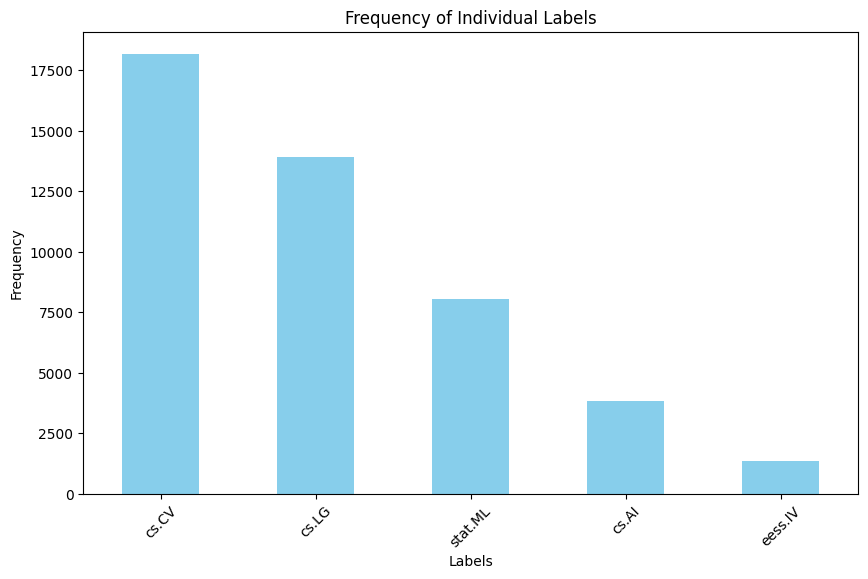

In [ ]:
individual_label_counts = filtered_data['terms'].explode().value_counts()

plt.figure(figsize=(10, 6))
individual_label_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Individual Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Visualized the distribution of label combination frequencies

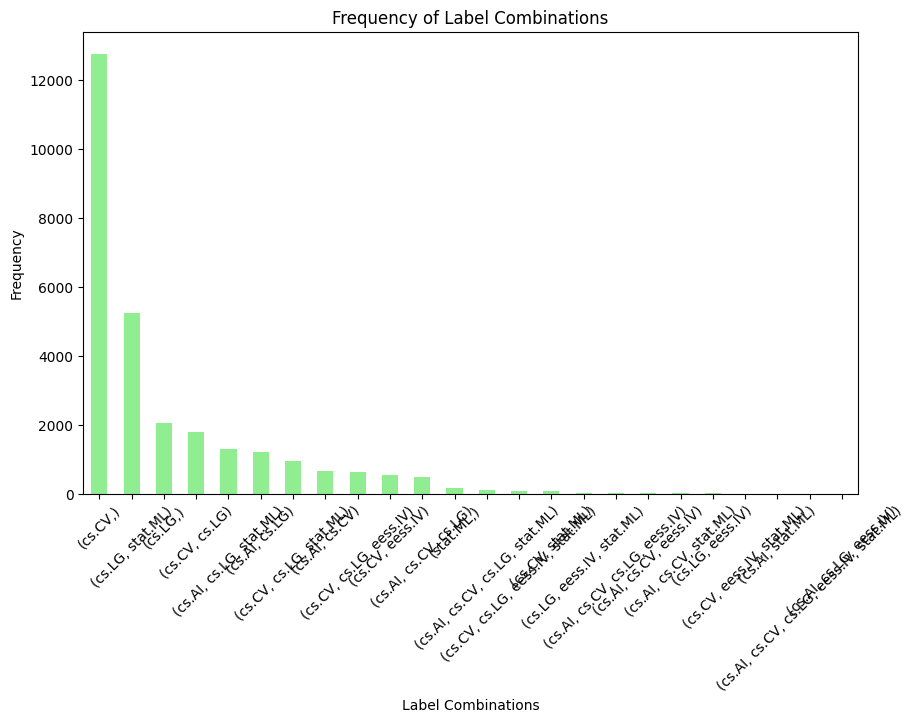

In [ ]:
label_combinations_counts = filtered_data['terms'].apply(lambda x: tuple(sorted(x))).value_counts()

plt.figure(figsize=(10, 6))
label_combinations_counts.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Label Combinations')
plt.xlabel('Label Combinations')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

saving the data for model training.

In [ ]:
filtered_data.to_csv('filtered_data.csv', index=False)

**Final Note -**

To address the class imbalance problem stemming from the dataset's 1099 unique labels, we've narrowed our focus to only the top 5 labels. This step involved retaining records where the "terms" attribute corresponds exclusively to these top 5 labels, either as individual labels or in combinations.

Despite this refinement, significant class imbalance persists, as evident from the graph analysis.

Given that SMOTE techniques are incompatible with multiclass multilabel classification, we're opting to assign weights to both labels and samples during the model training process. This approach allows us to mitigate the effects of class imbalance effectively.